# 1 Подготовка рабочей среды и первичное исследование данных

## 1.1 Загрузка библиотек

Загружаем основные библиотеки для работы с данными. В процессе добавляем сюда библиотеки котрые буду использовать дальше.

In [71]:
!pip install shap

     |████████████████████████████████| 564 kB 5.0 MB/s 


In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, f1_score, accuracy_score, recall_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression

import shap

import warnings
warnings.filterwarnings("ignore")

## 1.2 Загрузка данных

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Кредитный скоринг/train.csv")

In [3]:
data

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1.0,50.0,1.0,2.0,18000.0,4.0,1.0,N,0.0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3.0,50.0,2.0,3.0,19000.0,4.0,1.0,N,0.0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1.0,80.0,1.0,2.0,30000.0,1.0,4.0,Y,0.0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2.0,50.0,2.0,3.0,10000.0,1.0,3.0,N,0.0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1.0,60.0,2.0,3.0,30000.0,1.0,4.0,Y,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65323,89627,06APR2014,GRD,M,59,Y,Y,0,0,-2.670713,0.0,70.0,2.0,3.0,950000.0,1.0,4.0,N,0.0
65324,72591,20MAR2014,GRD,M,41,Y,Y,0,0,-2.494569,1.0,80.0,2.0,3.0,350000.0,1.0,3.0,Y,0.0
65325,71117,19MAR2014,GRD,F,36,N,N,1,1,-0.916457,8.0,50.0,1.0,2.0,15000.0,1.0,3.0,N,0.0
65326,60783,10MAR2014,SCH,M,42,Y,N,0,0,-2.556623,5.0,60.0,2.0,3.0,120000.0,1.0,4.0,Y,0.0


**Описание данных:**

* client_id - идентификатор клиента

* education - уровень образования

* sex - пол заемщика

* age - возраст заемщика

* car - флаг наличия автомобиля

* car_type - флаг автомобиля иномарки

* decline_app_cnt - количество отказанных прошлых заявок

* good_work - флаг наличия “хорошей” работы

* bki_request_cnt - количество запросов в БКИ

* home_address - категоризатор домашнего адреса

* work_address - категоризатор рабочего адреса

* income - доход заемщика

* foreign_passport - наличие загранпаспорта

* sna - связь заемщика с клиентами банка

* first_time - давность наличия информации о заемщике

* score_bki - скоринговый балл по данным из БКИ

* region_rating - рейтинг региона

* app_date - дата подачи заявки

* default - флаг дефолта по кредиту

## 1.3 Первичное исследование данных

In [4]:
data.shape

(65328, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65328 entries, 0 to 65327
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         65328 non-null  int64  
 1   app_date          65328 non-null  object 
 2   education         65058 non-null  object 
 3   sex               65328 non-null  object 
 4   age               65328 non-null  int64  
 5   car               65328 non-null  object 
 6   car_type          65328 non-null  object 
 7   decline_app_cnt   65328 non-null  int64  
 8   good_work         65328 non-null  int64  
 9   score_bki         65328 non-null  float64
 10  bki_request_cnt   65327 non-null  float64
 11  region_rating     65327 non-null  float64
 12  home_address      65327 non-null  float64
 13  work_address      65327 non-null  float64
 14  income            65327 non-null  float64
 15  sna               65327 non-null  float64
 16  first_time        65327 non-null  float6

In [6]:
data.describe()

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,default
count,65328.000000,65328.000000,65328.000000,65328.000000,65328.000000,65327.000000,65327.000000,65327.000000,65327.000000,65327.000000,65327.000000,65327.000000,65327.000000
mean,55223.127066,39.273619,0.275931,0.165151,-1.905132,2.003475,56.697078,1.575765,2.496227,41078.858558,1.734092,2.765656,0.126364
std,31825.781428,11.517018,0.802529,0.371320,0.498552,2.252751,13.053546,0.527143,0.689790,46147.114218,1.123936,1.010185,0.332262
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000
25%,27567.750000,30.000000,0.000000,0.000000,-2.260652,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000
50%,55410.000000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000
75%,82788.500000,48.000000,0.000000,0.000000,-1.569479,3.000000,60.000000,2.000000,3.000000,47632.000000,2.000000,4.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000


In [7]:
data.nunique()

client_id           65328
app_date              120
education               5
sex                     2
age                    52
car                     2
car_type                2
decline_app_cnt        20
good_work               2
score_bki           61204
bki_request_cnt        37
region_rating           7
home_address            3
work_address            3
income                909
sna                     4
first_time              4
foreign_passport        2
default                 2
dtype: int64

In [8]:
data.education.unique()

array(['SCH', 'GRD', 'UGR', 'PGR', 'ACD', nan], dtype=object)

Наверное можно предположить, что:
* SCH - школьное
* GRD - Выпускник магистратуры ?
* UGR - Выпускник бакалавриата
* PGR - к.н или д.н
* ACD - академик

In [9]:
data.home_address.unique()

array([ 1.,  2.,  3., nan])

In [10]:
data.work_address.unique()

array([ 2.,  3.,  1., nan])

In [11]:
cat_col = ["education", "sex", "car", "car_type", "good_work", "home_address", "work_address", "foreign_passport"]

In [12]:
print("Пропущенные значения","\n", data.isna().sum(), sep = "")

Пропущенные значения
client_id             0
app_date              0
education           270
sex                   0
age                   0
car                   0
car_type              0
decline_app_cnt       0
good_work             0
score_bki             0
bki_request_cnt       1
region_rating         1
home_address          1
work_address          1
income                1
sna                   1
first_time            1
foreign_passport      1
default               1
dtype: int64


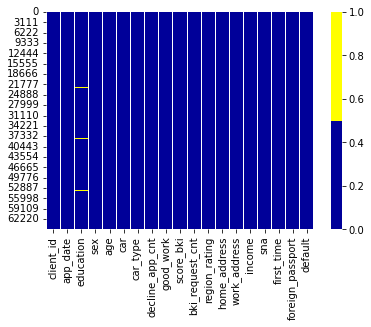

In [13]:
cols = data.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))
None

## 1.4 Обработка данных

In [14]:
data.education = data.education.fillna(data.education.mode())

In [15]:
data = data.dropna()

In [16]:
data[cat_col] = data[cat_col].astype("object")

Приведём дату рабочий вид
выделем в отдельные столбцы день и месяц,
в данном случае год я решил не добавлять, так как год меняется и в случае проверки клиента в новом году модель не будет знать что наступил другой год

In [17]:
day = []
month = []
for i in data.app_date:
  day.append(i[:2])
  month.append(i[2:5])

In [18]:
data["day"] = day
data["month"] = month
data = data.drop(["app_date"], axis = 1)

In [19]:
data

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default,day,month
0,25905,SCH,M,62,Y,Y,0,0,-2.008753,1.0,50.0,1,2,18000.0,4.0,1.0,N,0.0,01,FEB
1,63161,SCH,F,59,N,N,0,0,-1.532276,3.0,50.0,2,3,19000.0,4.0,1.0,N,0.0,12,MAR
2,25887,SCH,M,25,Y,N,2,0,-1.408142,1.0,80.0,1,2,30000.0,1.0,4.0,Y,0.0,01,FEB
3,16222,SCH,F,53,N,N,0,0,-2.057471,2.0,50.0,2,3,10000.0,1.0,3.0,N,0.0,23,JAN
4,101655,GRD,M,48,N,N,0,1,-1.244723,1.0,60.0,2,3,30000.0,1.0,4.0,Y,0.0,18,APR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65322,105100,SCH,F,25,N,N,0,0,-1.624982,0.0,40.0,1,2,30000.0,1.0,4.0,N,0.0,23,APR
65323,89627,GRD,M,59,Y,Y,0,0,-2.670713,0.0,70.0,2,3,950000.0,1.0,4.0,N,0.0,06,APR
65324,72591,GRD,M,41,Y,Y,0,0,-2.494569,1.0,80.0,2,3,350000.0,1.0,3.0,Y,0.0,20,MAR
65325,71117,GRD,F,36,N,N,1,1,-0.916457,8.0,50.0,1,2,15000.0,1.0,3.0,N,0.0,19,MAR


#2 Исследование данных и постановка гипотез

**Гипотезы**
* Дефолт зависит от образования (чем выше ступень образования, тем меньше вероятность получить дефолт)
* Дефолт зависит от возраста (люди среднего возраста (от 30 до 50 лет) с большей вероятностью вернут заём)
* Образование зависит от возраста, тем самым влияя на дефолт (тем выше возраст, тем выше ступень образования и тем самым ниже вероятность дефолта)
* score_bki является ключевым фактором на то, что заёмщик "хороший" или "плохой"
* Хорошая работа (good_work = 1) увеличивает шанс возврата кредита
* Количество отказанных заявок в прошлом (чем больше отказов, тем выше вероятность невозврата займа)
* Вероятность невозврата зависит от даты выдачи займа (в периоды подготовки к новогодним праздникам - декабрь и начало учебного года - сентябрь, когда люди более не обдумао совершают покупки)
* Больший процент невыдачи займов приходиться на дату выдачи в конце месяца, когда ждут ЗП.

**Важно!**

Все данные нормируются на размер датасета 

###**Default**

,index,default
0,0.0,87.357241
1,1.0,12.642759


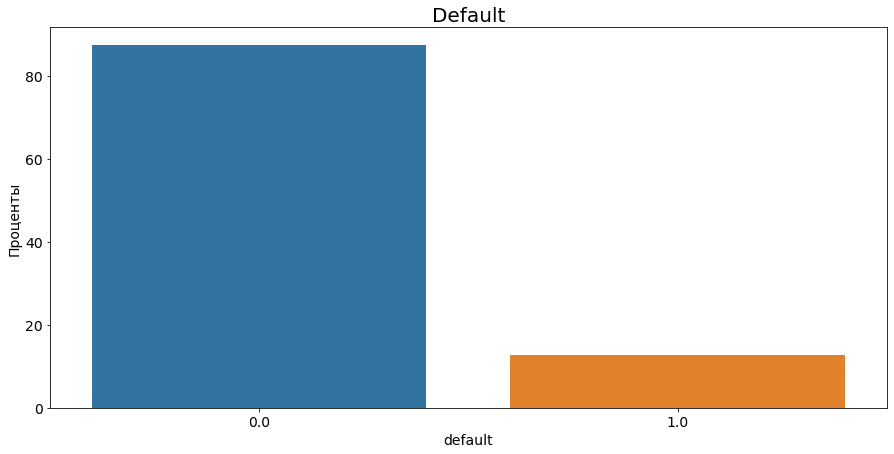

In [20]:
norm_def = (data
               .default
               .value_counts(normalize=True)
               .mul(100)
               .reset_index())

plt.figure(figsize=(15, 7))
sns.barplot(x='index', y='default', data=norm_def)

plt.title('Default', fontsize=20)

plt.xlabel('default', fontsize=14)
plt.ylabel('Проценты', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
None
norm_def

Наблюдается дисбаланс классов, нужно иметь при построении модели

###**Education**


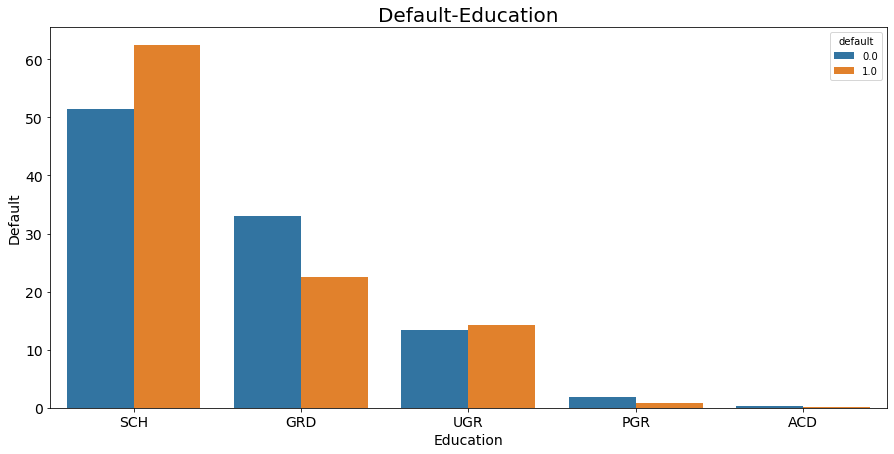

In [21]:
plt.figure(figsize=(15, 7))

ed_def = (data.groupby("default")["education"]
          .value_counts(normalize = True)
          .rename("percent")
          .mul(100)
          .reset_index())

sns.barplot(x='education', y='percent', hue="default", data=ed_def)

plt.title('Default-Education', fontsize=20)
plt.ylabel('Default', fontsize=14)
plt.xlabel('Education', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
None

Из графика видно, что люди со школным образованием чаще не возвращают займы, так же люди со степенью бакалавра чаще не возвращают кредит.
Магистры, люди с научной степенью и академики наоборот являются более хорошими плательщиками.

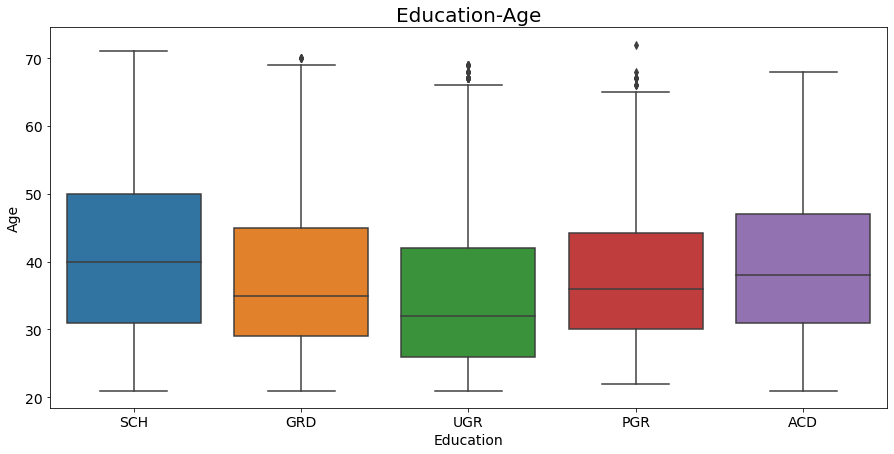

In [22]:
plt.figure(figsize=(15, 7))

sns.boxplot(x = "education", y = "age", data=data)

plt.title("Education-Age", fontsize = 20)
plt.xlabel("Education", fontsize = 14)
plt.ylabel("Age", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
None

Вывод достаточно неоднозначный, видно, что чем меньше ступень образования, тем ниже возраст, кроме школьного. Можно предположить, что займы людям со школьным образованием нужны чаще ближе к среденму возрасту.

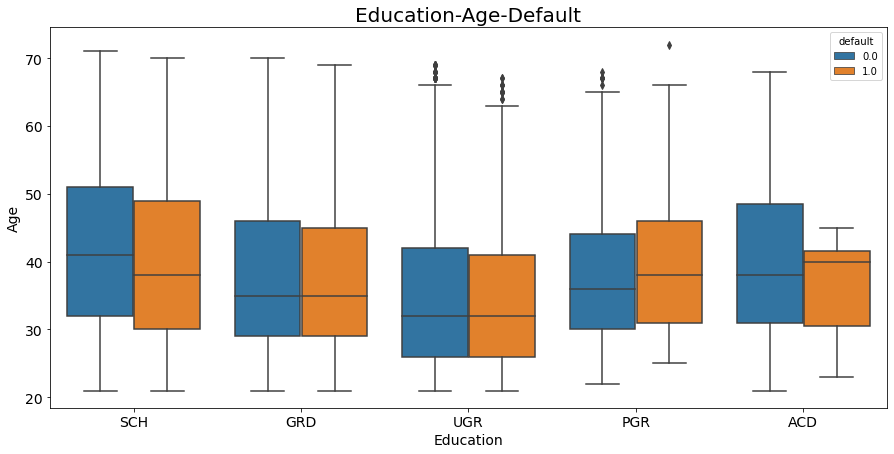

In [23]:
plt.figure(figsize=(15, 7))

sns.boxplot(x = "education", y = "age",hue="default", data=data)

plt.title("Education-Age-Default", fontsize = 20)
plt.xlabel("Education", fontsize = 14)
plt.ylabel("Age", fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
None

Из этого графика видно, что для академиков и людей с н.с. медианный возраст выше у плохих заёмщиков. У бакалавров и магистров примерно равны. У людей со школьным образованием возраст хороших заёмщиков выше.

###**Age**


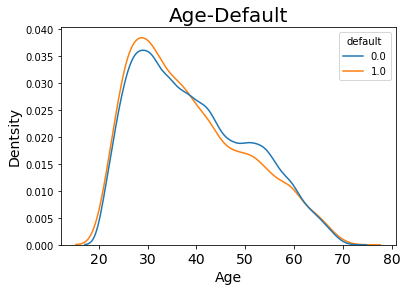

In [24]:
sns.kdeplot(x = "age", hue = "default", data =data, common_norm=False)

plt.title('Age-Default', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
None

Из графика видно, что существует тенденция, что люди от ~40 до ~60 чаще возвращают займы, чем люди других возрастов.

###**Work**

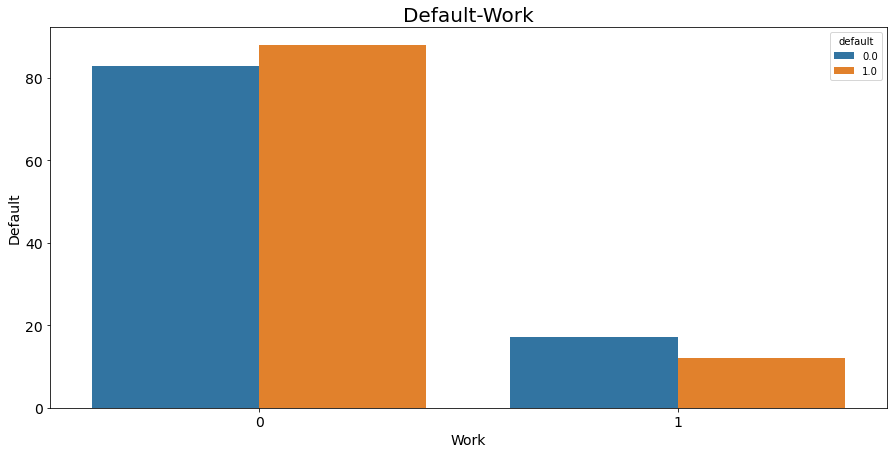

In [25]:
plt.figure(figsize=(15, 7))

ed_def = (data.groupby("default")["good_work"]
          .value_counts(normalize = True)
          .rename("percent")
          .mul(100)
          .reset_index())

sns.barplot(x='good_work', y='percent', hue="default", data=ed_def)

plt.title('Default-Work', fontsize=20)
plt.ylabel('Default', fontsize=14)
plt.xlabel('Work', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
None

Наблюдается тенденция, что люди с хорошей работой чаще возвращают займы.

###**decline_app_cnt**

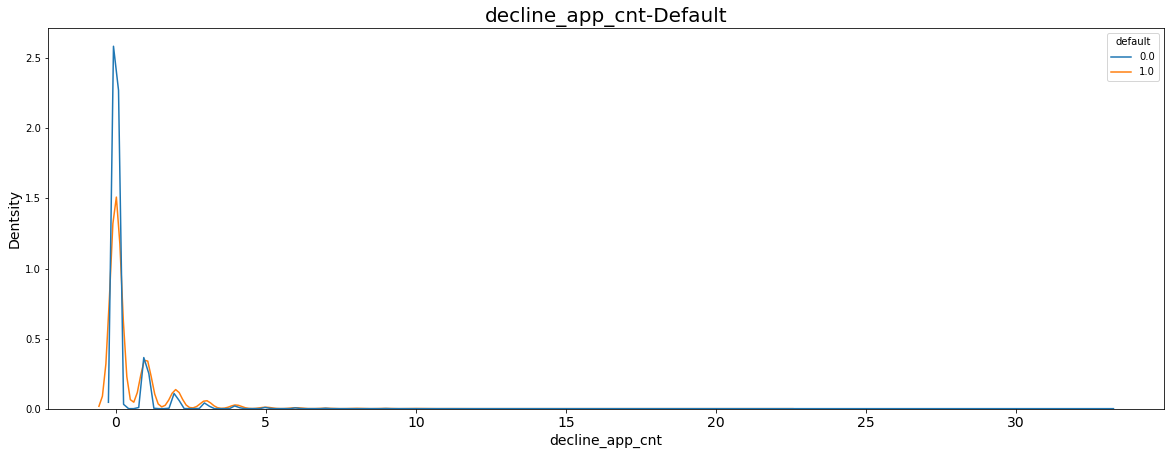

In [26]:
plt.figure(figsize=(20, 7))
sns.kdeplot(x = "decline_app_cnt", hue = "default", data =data, common_norm=False)

plt.title('decline_app_cnt-Default', fontsize=20)
plt.xlabel('decline_app_cnt', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=10);

Из этого графика выводов особо не сделаешь, и из других собственно тоже (попробовал).

###**Date**

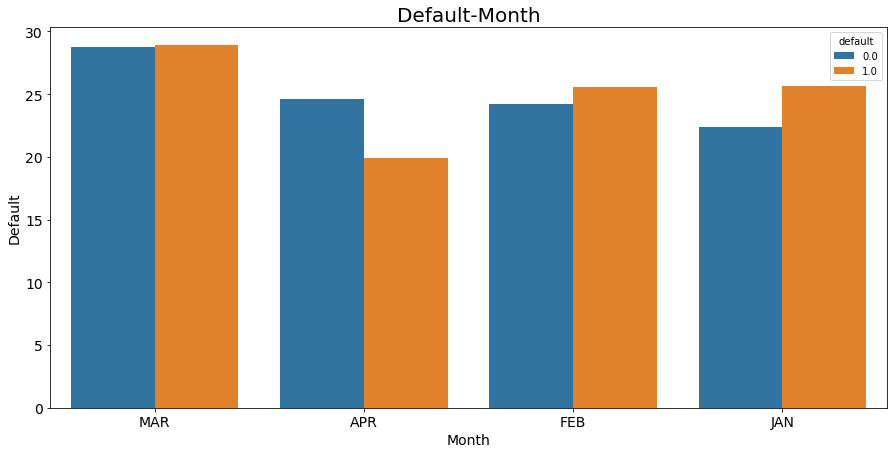

In [27]:
plt.figure(figsize=(15, 7))

ed_def = (data.groupby("default")["month"]
          .value_counts(normalize = True)
          .rename("percent")
          .mul(100)
          .reset_index())

sns.barplot(x='month', y='percent', hue="default", data=ed_def)

plt.title('Default-Month', fontsize=20)
plt.ylabel('Default', fontsize=14)
plt.xlabel('Month', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
None

К сожелению не удастся проверить эту гипотезу, так так данные только за четыре месяца.

###**day**

In [28]:
data.day = data.day.astype("int")

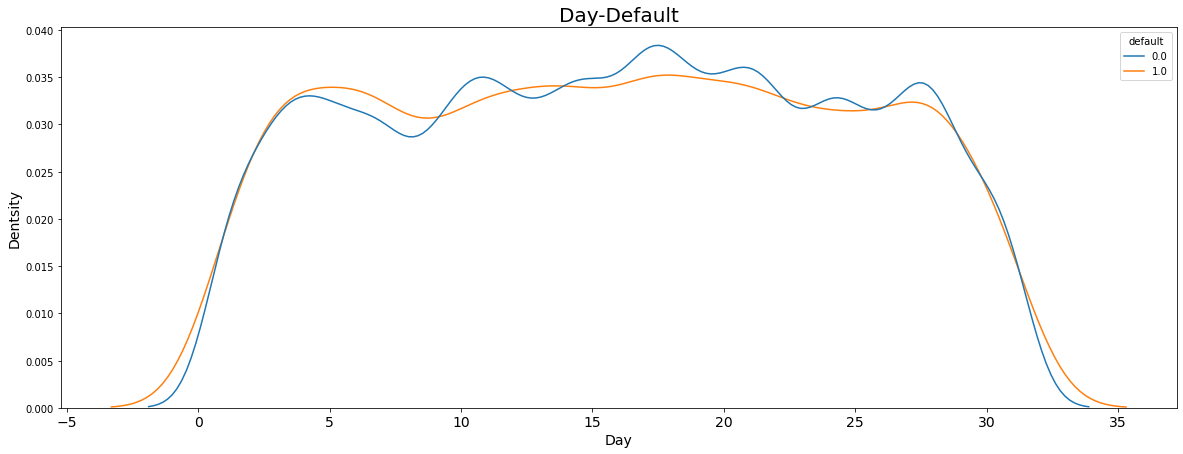

In [29]:
plt.figure(figsize=(20, 7))
sns.kdeplot(x = "day", hue = "default", data =data, common_norm=False)

plt.title('Day-Default', fontsize=20)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=10);

Есть шансы, что гипотеза опровергнется, так как из графика видно, что тендеция неотдавать займ выше в начале месяца. Возможно люди берут кредит в момент полной уверенности, что они его выплатят (то есть после ЗП)

###**Корреляция**

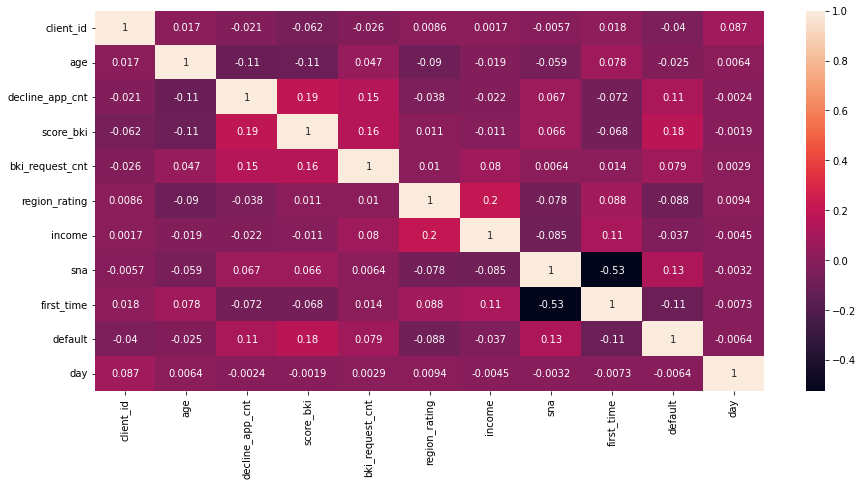

In [30]:
cor = data.corr()
plt.figure(figsize=(15,7))
sns.heatmap(cor, annot=True)
None

Значительной корреляции не наблюдается, следвательно нет признаков дублировать вклад в модель

#3 Подготовка данных

Поскольку в задачах кредитного скоринга используются легко интерпритируемые модели, то для начала будет использоваться модель логистической регрессии. Для этого сразу стоит подготовить данные, чтобы модели было проще подбирать веса (например приведение данных с ненормальным распределением к нормальному (хотя бы приблизить)).

In [31]:
num_col = []
for i in data.columns:
  if i not in cat_col:
    num_col.append(i)

In [32]:
data.client_id

0         25905
1         63161
2         25887
3         16222
4        101655
          ...  
65322    105100
65323     89627
65324     72591
65325     71117
65326     60783
Name: client_id, Length: 65057, dtype: int64

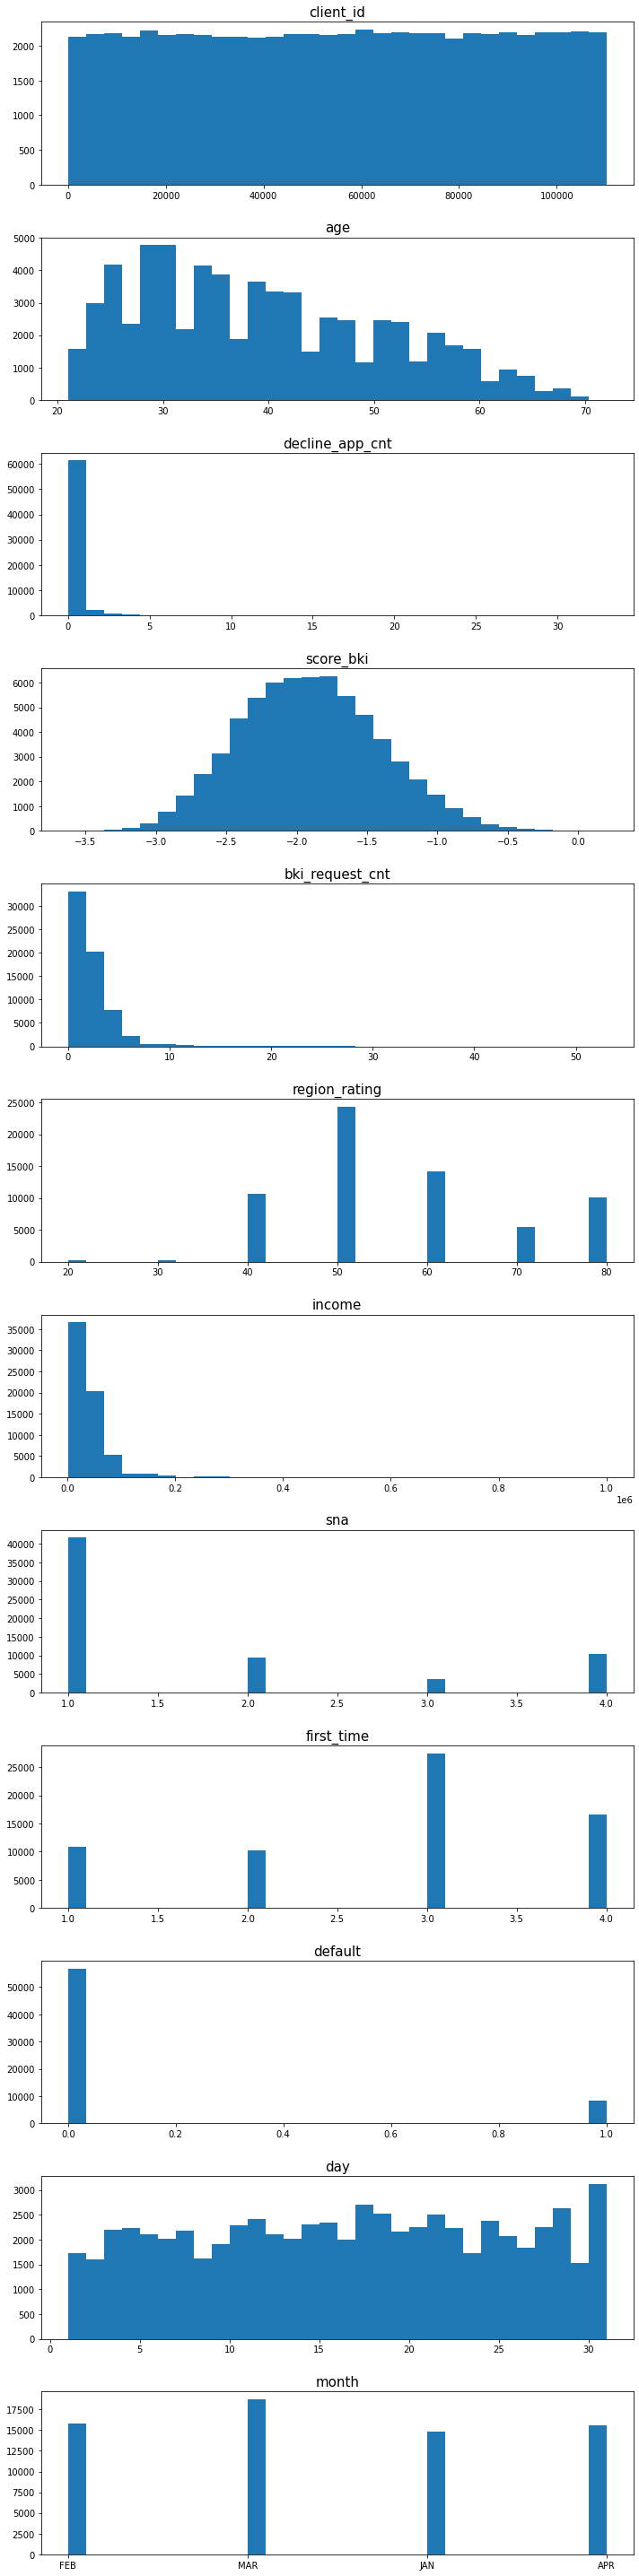

In [33]:
fig, axs = plt.subplots(len(num_col), 1, sharey=False, tight_layout=True, figsize = (10, 40))
axs_num = 0

for i in num_col:
  axs[axs_num].hist(data[i], 30)
  axs[axs_num].set_title(i, fontsize = 15)
  axs_num += 1

Можно попробовать отнормировать данные путём логарифмирования

In [34]:
def log_to_norm(col):
  col = np.log(col+1)
  return col

In [35]:
data.decline_app_cnt = log_to_norm(data.decline_app_cnt)
data.bki_request_cnt = log_to_norm(data.bki_request_cnt)
data.income = log_to_norm(data.income)

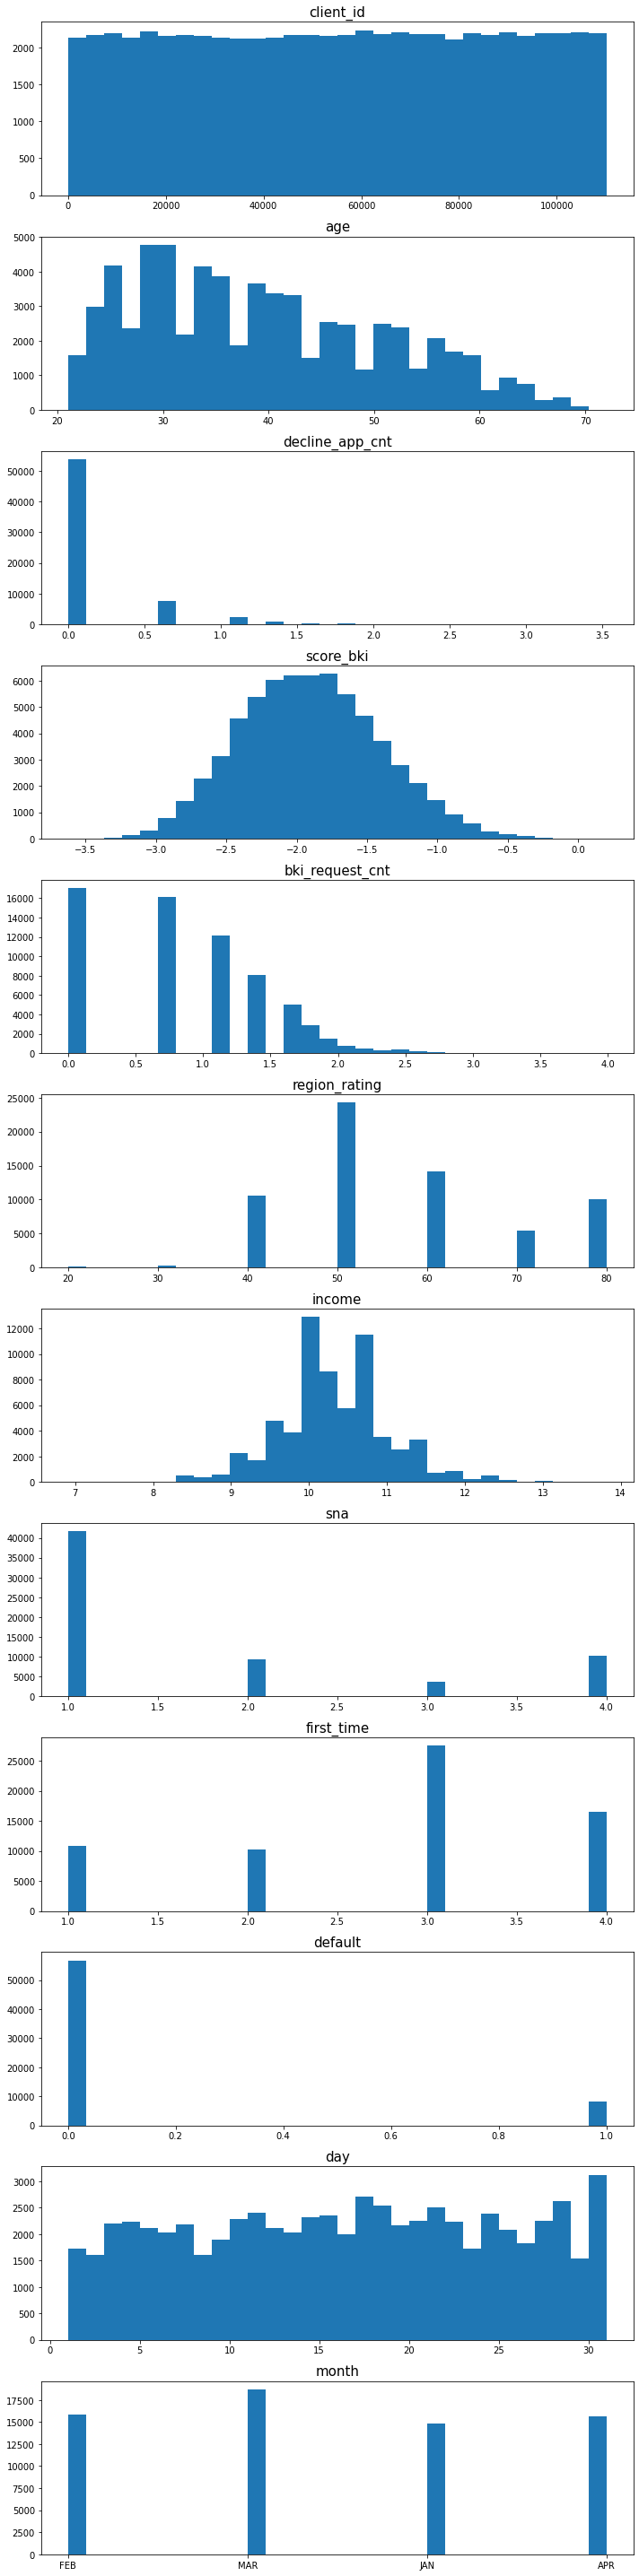

In [36]:
fig, axs = plt.subplots(len(num_col), 1, sharey=False, tight_layout=True, figsize = (10, 40))
axs_num = 0

for i in num_col:
  axs[axs_num].hist(data[i], 30)
  axs[axs_num].set_title(i, fontsize = 15)
  axs_num += 1

Стало лучше)

Удалим данные которые не несут в себе смысла для модели (id) и закодируем категориальные данные используя one-hot-encoding

In [37]:
data = data.drop("client_id", axis=1)

In [38]:
cat_col

['education',
 'sex',
 'car',
 'car_type',
 'good_work',
 'home_address',
 'work_address',
 'foreign_passport']

In [39]:
cat_col.append('month')

In [40]:
data_cat_col = pd.get_dummies(data[cat_col])

In [41]:
data = data.join(data_cat_col)

In [42]:
data = data.drop(cat_col, axis = 1)

#4 Обучение модели

Ключевая метрика на котрую стоит ориентриваться это Recall, так как по статистике выдача щайма плохому кредитору несют больше убытков для компании, чем невыдача займа хорошему.

In [43]:
X = data.drop("default", axis = 1)
y = data.default

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

###**Baseline**


Так как целевая метрика recall, то устранение от дисбаланса классов бесмыслено, так как recall не зависит от этого, а в процессе обучения может даже ухудшить ситуацию.

In [45]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

y_pred_score = lr.predict_proba(X_test)[:,1]

In [46]:
print("roc_auc", roc_auc_score(y_test, y_pred_score))
print("precision", precision_score(y_test, y_pred))
print("recall", recall_score(y_test, y_pred))
print("f1", f1_score(y_test, y_pred))

roc_auc 0.7333800872203151
precision 0.42567567567567566
recall 0.03037608486017358
f1 0.056705670567056714


In [47]:
data_metrics = pd.DataFrame([roc_auc_score(y_test, y_pred_score), 
                             precision_score(y_test, y_pred),recall_score(y_test, y_pred), 
                             f1_score(y_test, y_pred)], 
                            columns = ["Baseline"], 
                            index = ["roc_auc", "precision", "recall", "f1"])

In [48]:
data_metrics

,Baseline
roc_auc,0.733380
precision,0.425676
recall,0.030376
f1,0.056706


###**Grid**


In [61]:
parametrs = {
    "penalty":["l2", "l1", "elasticnet"],
    'C': np.linspace(1, 1000, num=5),
    'max_iter': np.arange(100, 501, 100),
    'l1_ratio': [None, 0.25, 0.5, 0.75],
    }

lr = LogisticRegression()

grid = GridSearchCV(lr, parametrs, cv = 5, n_jobs = -1, scoring="recall", verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([   1.  ,  250.75,  500.5 ,  750.25, 1000.  ]),
                         'l1_ratio': [None, 0.25, 0.5, 0.75],
                         'max_iter': array([100, 200, 300, 400, 500]),
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='recall', verbose=3)

In [58]:
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [62]:
best_params = grid.best_params_

In [63]:
best_params

{'C': 1000.0, 'l1_ratio': None, 'max_iter': 300, 'penalty': 'l2'}

###**BestModel**


In [64]:
lr = LogisticRegression(**best_params)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred_score = lr.predict_proba(X_test)[:,1]

In [65]:
print("roc_auc", roc_auc_score(y_test, y_pred_score))
print("precision", precision_score(y_test, y_pred))
print("recall", recall_score(y_test, y_pred))
print("f1", f1_score(y_test, y_pred))

roc_auc 0.7330995435125433
precision 0.43037974683544306
recall 0.03278688524590164
f1 0.06093189964157707


In [66]:
data_metrics["best_model"] = [roc_auc_score(y_test, y_pred_score), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)]

In [67]:
data_metrics

,Baseline,best_model
roc_auc,0.733380,0.733100
precision,0.425676,0.430380
recall,0.030376,0.032787
f1,0.056706,0.060932


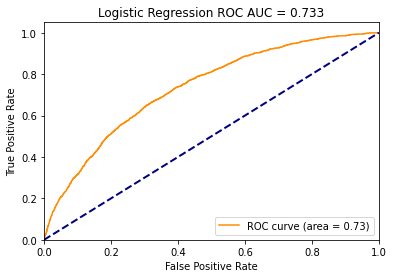

In [75]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

Исходя из результатов модель не годится для обнаружения плохих заёмщиков (recall очень мал). Возможно нужно применить другие методы обработки данных или методы машинного обучения(градиентый бустинг на решающих деревьях, методы опорных векторов и т.д.), но многие потенциально лучшие модели являются неинтерпритируемыми. Поэтому ограничимся логистической регрессией.

#5 Анализ ключевых признаков

Для того чтобы оценить, влияние признаков построим диаграмму Shap

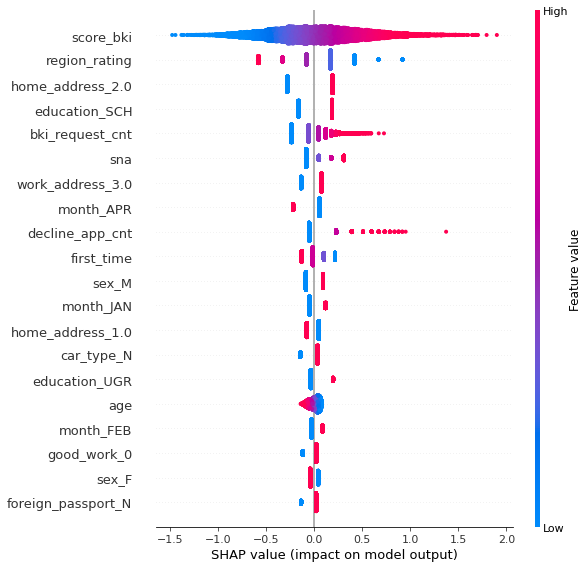

In [76]:
explainer = shap.LinearExplainer(lr, X_train, feature_dependence="independent")
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

Как и предполагалось, score_bki является ключевым признаком выдачи кредита (чем он выше, тем выше вероятность дефолта, что очень странно, так как обычно чем выше score_bki, тем лучше заёмщик)

Так же сильно влияет рейтинг региона, люди из регионов с высоким рейтингом чаще возвращают кредиты.